In [2]:
#import dependencies

import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure 

from scipy.stats import linregress

import numpy as np

import random

from citipy import citipy

import sys
sys.path.append("..")

from config import weather_api_key

import time
from datetime import datetime

import requests

In [3]:
weather_data_to_load = "weather_data\cities.csv"

city_data_df = pd.read_csv(weather_data_to_load)

city_data_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Busselton,AU,2022-03-23 20:34:14,-33.6500,115.3333,55.33,82,0,12.37
1,1,Ambon,ID,2022-03-23 20:34:14,-3.6954,128.1814,79.36,81,100,12.73
2,2,Nipawin,CA,2022-03-23 20:34:15,53.3668,-104.0009,37.44,75,0,6.91
3,3,Saldanha,ZA,2022-03-23 20:34:15,-33.0117,17.9442,68.05,88,31,18.61
4,4,Albany,US,2022-03-23 20:30:35,42.6001,-73.9662,46.02,39,100,1.99


In [4]:
#extract relevant data to plot

lats = city_data_df["Lat"]

max_temps = city_data_df["Max Temp"]

humidity = city_data_df["Humidity"]

cloudiness = city_data_df["Cloudiness"]

wind_speed = city_data_df["Wind Speed"]



In [5]:
#time test

today = time.time()

print(today)

today_formatted = time.strftime("%x")

print(today_formatted)

1648151218.5167925
03/24/22


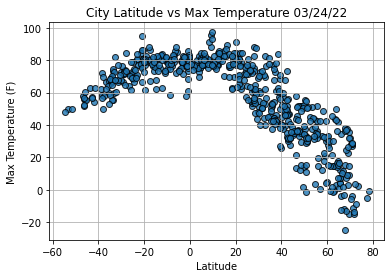

<Figure size 432x288 with 0 Axes>

In [6]:
#build the scatter plot for lat vs max temp

plt.scatter(lats,
            max_temps,
            edgecolors="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

plt.title(f"City Latitude vs Max Temperature " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

plt.show()

#save
plt.savefig("weather_data/Fig1.png")


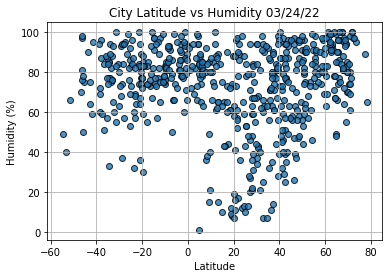

<Figure size 432x288 with 0 Axes>

In [7]:
#build the scatter plot for lat vs humidity

plt.scatter(lats,
            humidity,
            edgecolors="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

plt.title(f"City Latitude vs Humidity " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

plt.show()

#save
plt.savefig("weather_data/Fig2.png")

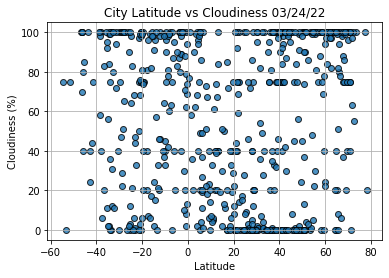

<Figure size 432x288 with 0 Axes>

In [8]:
#build the scatter plot for lat vs max temp

plt.scatter(lats,
            cloudiness,
            edgecolors="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

plt.title(f"City Latitude vs Cloudiness " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

plt.show()

#save
plt.savefig("weather_data/Fig3.png")

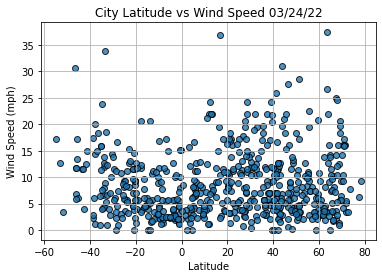

<Figure size 432x288 with 0 Axes>

In [9]:
#build the scatter plot for lat vs max temp

plt.scatter(lats,
            wind_speed,
            edgecolors="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

plt.title(f"City Latitude vs Wind Speed " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

plt.show()

#save
plt.savefig("weather_data/Fig4.png")

In [49]:
#create function for linear regression and plot

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Perform linear regression.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept

    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


    #size
    figure(figsize=(11,8))
    # Create a scatter plot of the x and y values.
    plt.scatter(x_values,y_values)
    # Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation and add its coordinates.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [50]:
#hemisphere df 

northern_df = city_data_df.loc[(city_data_df["Lat"]>=0)]

northern_df

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,2,Nipawin,CA,2022-03-23 20:34:15,53.3668,-104.0009,37.44,75,0,6.91
4,4,Albany,US,2022-03-23 20:30:35,42.6001,-73.9662,46.02,39,100,1.99
5,5,Colares,PT,2022-03-23 20:34:16,38.7992,-9.4469,57.33,81,40,17.00
6,6,Lasa,IT,2022-03-23 20:34:16,46.6166,10.7002,45.48,63,1,0.51
7,7,Iqaluit,CA,2022-03-23 20:34:17,63.7506,-68.5145,2.93,78,100,3.44
...,...,...,...,...,...,...,...,...,...,...
585,585,Tongliao,CN,2022-03-23 20:50:19,43.6125,122.2653,32.02,49,0,5.48
586,586,Pochutla,MX,2022-03-23 20:50:19,15.7432,-96.4661,86.83,43,13,9.10
587,587,Oyama,JP,2022-03-23 20:50:20,36.3000,139.8000,42.58,72,81,4.74
589,589,Medina Del Campo,ES,2022-03-23 20:50:21,41.3124,-4.9141,51.76,73,92,10.65


In [51]:
southern_df = city_data_df.loc[(city_data_df["Lat"]<=0)]

southern_df

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Busselton,AU,2022-03-23 20:34:14,-33.6500,115.3333,55.33,82,0,12.37
1,1,Ambon,ID,2022-03-23 20:34:14,-3.6954,128.1814,79.36,81,100,12.73
3,3,Saldanha,ZA,2022-03-23 20:34:15,-33.0117,17.9442,68.05,88,31,18.61
8,8,Bambanglipuro,ID,2022-03-23 20:34:17,-7.9500,110.2833,76.60,91,100,1.28
9,9,Paragominas,BR,2022-03-23 20:34:18,-2.9667,-47.4833,77.09,94,98,1.90
...,...,...,...,...,...,...,...,...,...,...
580,580,Santa Fe,AR,2022-03-23 20:47:22,-31.6333,-60.7000,77.02,83,94,4.00
581,581,Potosi,BO,2022-03-23 20:50:17,-19.5836,-65.7531,61.74,30,74,11.77
582,582,Hualmay,PE,2022-03-23 20:50:17,-11.0964,-77.6139,73.53,75,40,11.05
583,583,Nelson Bay,AU,2022-03-23 20:50:18,-32.7167,152.1500,68.00,93,100,1.01


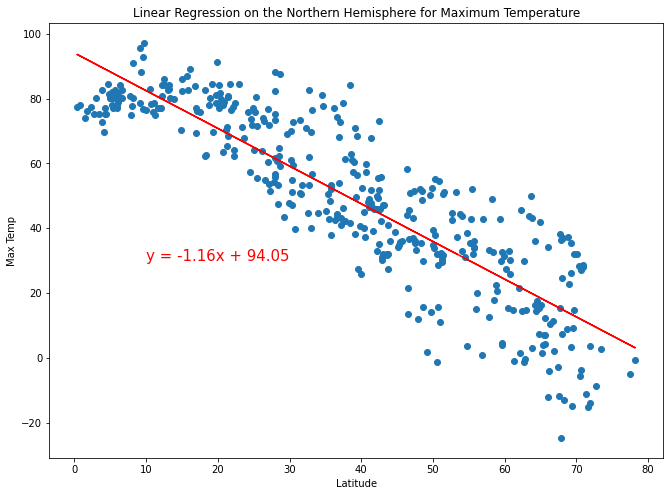

In [52]:
# linear regression on northern hemisphere

x_values = northern_df["Lat"]
y_values = northern_df["Max Temp"]

#call the function

plot_linear_regression(x_values, y_values,
                        "Linear Regression on the Northern Hemisphere for Maximum Temperature", 
                            "Max Temp",
                            (10,30))

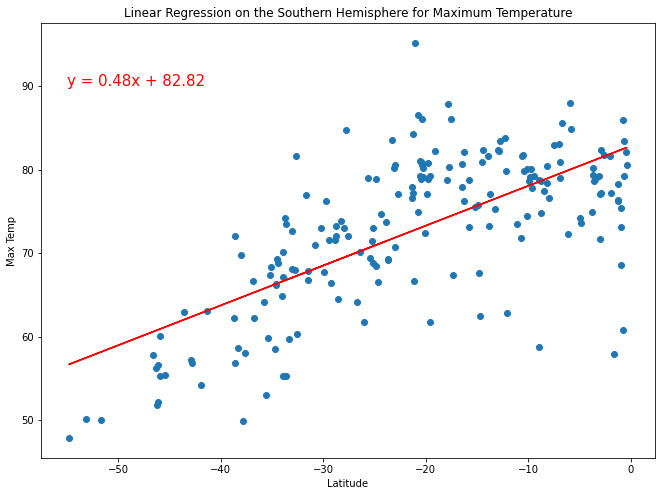

In [53]:
# linear regression on southern hemisphere

x_values = southern_df["Lat"]
y_values = southern_df["Max Temp"]

#call the function

plot_linear_regression(x_values, y_values,
                        "Linear Regression on the Southern Hemisphere for Maximum Temperature", 
                            "Max Temp",
                            (-55,90))

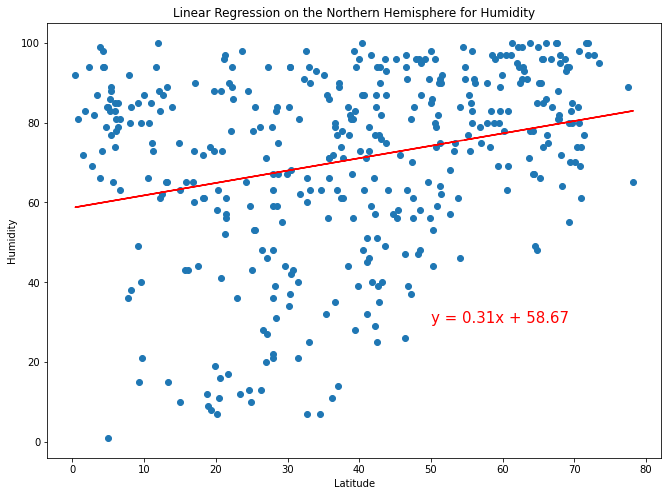

In [54]:
# linear regression on northern hemisphere

x_values = northern_df["Lat"]
y_values = northern_df["Humidity"]

#call the function

plot_linear_regression(x_values, y_values,
                        "Linear Regression on the Northern Hemisphere for Humidity", 
                            "Humidity",
                            (50,30))

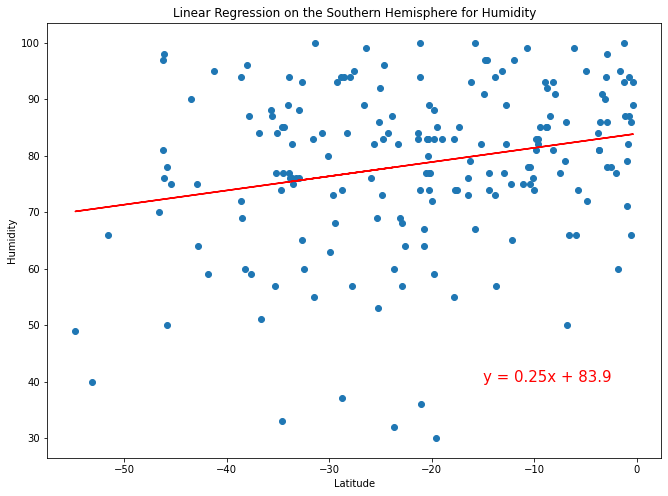

In [55]:
# linear regression on southern hemisphere

x_values = southern_df["Lat"]
y_values = southern_df["Humidity"]

#call the function

plot_linear_regression(x_values, y_values,
                        "Linear Regression on the Southern Hemisphere for Humidity", 
                            "Humidity",
                            (-15,40))

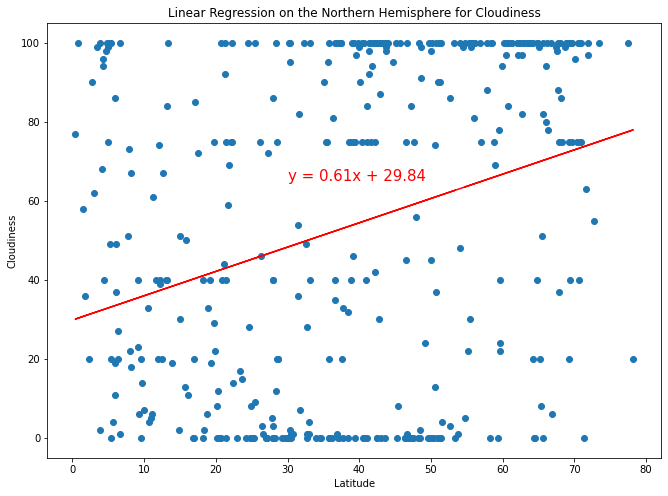

In [56]:
# linear regression on northern hemisphere

x_values = northern_df["Lat"]
y_values = northern_df["Cloudiness"]

#call the function

plot_linear_regression(x_values, y_values,
                        "Linear Regression on the Northern Hemisphere for Cloudiness", 
                            "Cloudiness",
                            (30,65))

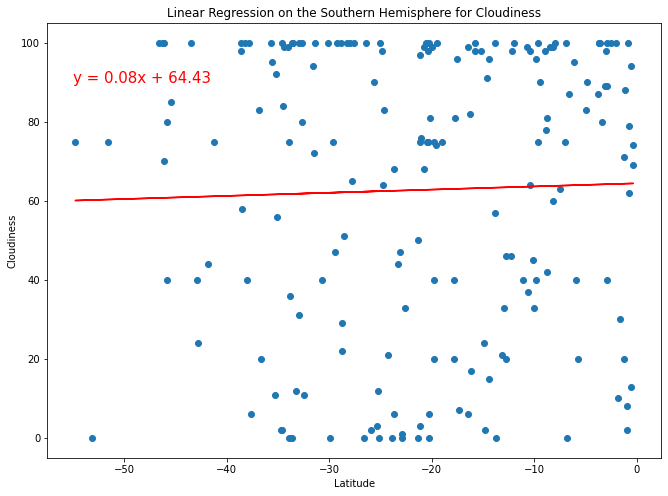

In [57]:
# linear regression on southern hemisphere

x_values = southern_df["Lat"]
y_values = southern_df["Cloudiness"]

#call the function

plot_linear_regression(x_values, y_values,
                        "Linear Regression on the Southern Hemisphere for Cloudiness", 
                            "Cloudiness",
                            (-55,90))

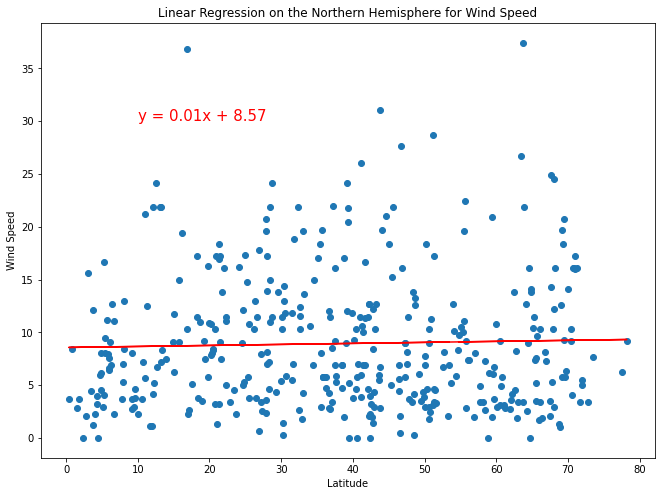

In [58]:
# linear regression on northern hemisphere

x_values = northern_df["Lat"]
y_values = northern_df["Wind Speed"]

#call the function

plot_linear_regression(x_values, y_values,
                        "Linear Regression on the Northern Hemisphere for Wind Speed", 
                            "Wind Speed",
                            (10,30))

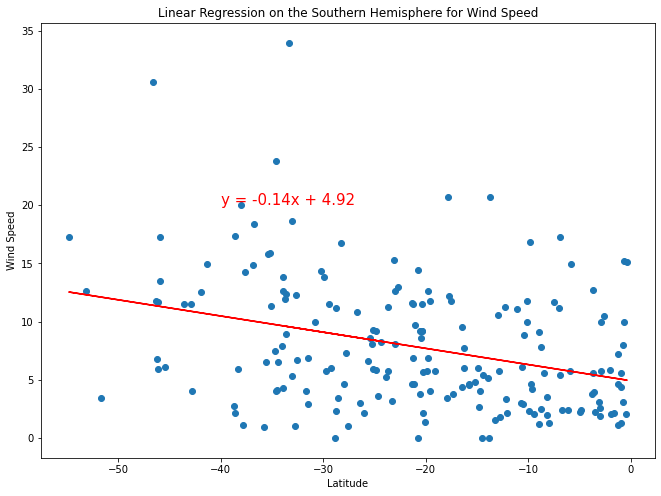

In [59]:
# linear regression on southern hemisphere

x_values = southern_df["Lat"]
y_values = southern_df["Wind Speed"]

#call the function

plot_linear_regression(x_values, y_values,
                        "Linear Regression on the Southern Hemisphere for Wind Speed", 
                            "Wind Speed",
                            (-40,20))